In [65]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install -q ragatouille

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 43.7 M

In [4]:
!pip install -q torch transformers transformers accelerate bitsandbytes langchain sentence-transformers faiss-gpu openpyxl pacmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [5]:
!pip install -q datasets

In [6]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset
import matplotlib.pyplot as plt

pd.set_option(
    "display.max_colwidth", None
)  # this will be helpful when visualizing retriever outputs

In [7]:
%cd /content/drive/MyDrive/CMU/Junior/11711/chuangjl/code

/content/drive/MyDrive/CMU/Junior/11711/chuangjl/code


In [8]:
!pwd

/content/drive/MyDrive/CMU/Junior/11711/chuangjl/code


# Process Schedule

In [25]:
import os
def get_line_to_dataset(file_path, num_line_combine = 10) -> dict:
    filename = os.path.basename(file_path).split('/')[-1]
    text = []
    source = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            text.append(line)
            source.append(f"{filename}")

    result = {"text": text, "source": source}
    return result

schedule_path = "/content/drive/MyDrive/CMU/Junior/11711/chuangjl/database/Courses_CMU/Schedule/augment.txt"
schedule_dict = get_line_to_dataset(schedule_path)
schedule_ds = Dataset.from_dict(schedule_dict)

In [26]:
ds = schedule_ds
print(ds)
print(type(ds))
print(type(ds['text']))
print(type(ds['text'][0]))
print(ds['source'][0])
print(ds['text'][0])

Dataset({
    features: ['text', 'source'],
    num_rows: 3109
})
<class 'datasets.arrow_dataset.Dataset'>
<class 'list'>
<class 'str'>
augment.txt
Below is information about CMU course Study Abroad. The course number is 48051 or 48-051. The course Study Abroad(48051) has 0.0 unit. The professor/instructor of Study Abroad(48051) in Spring 2024 is Instructor TBA. The department of Study Abroad(48051) is Architecture. The location of Study Abroad(48051) is Pittsburgh, Pennsylvania. The room of Study Abroad(48051) is not yet decided. The course happens in days not yet decided.



# Calendar

In [27]:
calendar_path = "../database/Courses_CMU/Calendars/Calendar_scentences.txt"
calendar_dict = get_line_to_dataset(calendar_path)
calendar_ds = Dataset.from_dict(calendar_dict)

In [28]:
ds = calendar_ds
print(ds)
print(type(ds))
print(type(ds['text']))
print(type(ds['text'][0]))
print(ds['source'][0])
print(ds['text'][0])

Dataset({
    features: ['text', 'source'],
    num_rows: 127
})
<class 'datasets.arrow_dataset.Dataset'>
<class 'list'>
<class 'str'>
Calendar_scentences.txt
Fall 2023



# Commencement

In [47]:
def read_as_list(file_path):
    lines = []
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    return lines

def concatenate_strings(string_list):
    # Concatenate all strings in the list
    result = ' '.join(string_list)
    return result

def list_to_dict(string_list, path):
    result = {"text": [string_list], "source": [os.path.basename(path).split('/')[-1]]}
    return result

# Example usage
commencement_path = "/content/drive/MyDrive/CMU/Junior/11711/chuangjl/database/Events_CMU/Commencement/Commencement.txt"

commencement_list = read_as_list("../database/Events_CMU/Commencement/Commencement.txt")

commencement_string_list = concatenate_strings(commencement_list)

commencement_dict = list_to_dict(commencement_string_list, commencement_path)

commencement_ds = Dataset.from_dict(commencement_dict)


['Commencement.txt']


In [ ]:
ds = commencement_ds
print(ds)
print(type(ds))
print(type(ds['text']))
print(type(ds['text'][0]))
print(ds['source'][0])
print(ds['text'][0])

# Concatenate Datasets

In [51]:
from datasets import concatenate_datasets
ds = concatenate_datasets([schedule_ds, calendar_ds, commencement_ds], axis = 0)

In [60]:
print(ds)
print(type(ds))
print(type(ds['text']))
print(type(ds['text'][0]))
print(ds['source'][-1])
print(len(ds['text'][-1]))

Dataset({
    features: ['text', 'source'],
    num_rows: 3111
})
<class 'datasets.arrow_dataset.Dataset'>
<class 'list'>
<class 'str'>
Commencement.txt
4526


# Form Base


In [61]:
from langchain.docstore.document import Document as LangchainDocument

RAW_KNOWLEDGE_BASE = [
    LangchainDocument(page_content=doc["text"], metadata={"source": doc["source"]})
    for doc in tqdm(ds)
]

  0%|          | 0/3111 [00:00<?, ?it/s]

In [62]:
print(RAW_KNOWLEDGE_BASE[0])

page_content='Below is information about CMU course Study Abroad. The course number is 48051 or 48-051. The course Study Abroad(48051) has 0.0 unit. The professor/instructor of Study Abroad(48051) in Spring 2024 is Instructor TBA. The department of Study Abroad(48051) is Architecture. The location of Study Abroad(48051) is Pittsburgh, Pennsylvania. The room of Study Abroad(48051) is not yet decided. The course happens in days not yet decided.\n' metadata={'source': 'augment.txt'}


  0%|          | 0/3111 [00:00<?, ?it/s]

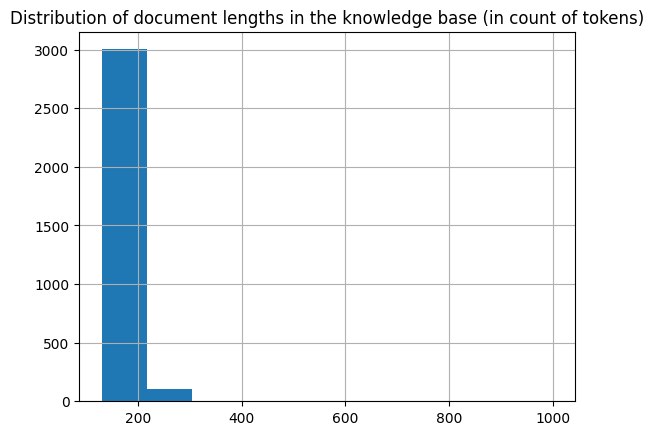

In [64]:
from sentence_transformers import SentenceTransformer

# To get the value of the max sequence_length, we will query the underlying `SentenceTransformer` object used in the RecursiveCharacterTextSplitter.
# print(
#     f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}"
# )

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Salesforce/SFR-Embedding-Mistral")
lengths = [len(tokenizer.encode(doc.page_content, padding=True, truncation=True, max_length=1000)) for doc in tqdm(RAW_KNOWLEDGE_BASE)]

# Plot the distrubution of document lengths, counted as the number of tokens
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

# There are txt files where we need to read line by line and there are those that would load in a single file

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
!pip install -q ragatouille

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 50.9

In [7]:
!pip install -q torch transformers transformers accelerate bitsandbytes langchain sentence-transformers faiss-gpu openpyxl pacmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [8]:
!pip install -q datasets

In [9]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset
import matplotlib.pyplot as plt

pd.set_option(
    "display.max_colwidth", None
)  # this will be helpful when visualizing retriever outputs

In [10]:
# %cd /content/drive/MyDrive/CMU/Junior/11711/chuangjl/code

In [11]:
def get_line_to_dataset(file_path, num_line_combine = 10) -> dict:
    filename = os.path.basename(file_path).split('/')[-1]
    text = []
    source = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            text.append(line)
            source.append(f"{filename}")

    result = {"text": text, "source": source}
    return result

In [12]:
def read_as_list(file_path):
    lines = []
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    return lines

def concatenate_strings(string_list):
    # Concatenate all strings in the list
    result = ' '.join(string_list)
    return result

def list_to_dict(string_list, path):
    result = {"text": [string_list], "source": [os.path.basename(path).split('/')[-1]]}
    return result

In [23]:
import os
from datasets import concatenate_datasets

data_base_path = "../database"

# Academics
handbooks_folder_path = "Academics_LTI/Handbook"
program_folders_path = "Academics_LTI/Programs_and_staff"
# Course
schedule_path = "Courses_CMU/Schedule/augment.txt"
calendar_path = "Courses_CMU/Calendars/Calendar_scentences.txt"
# Events
commencement_path = "Events_CMU/Commencement/Commencement.txt"
spring_path = "Events_CMU/Spring/carnival_and_reunion.txt"
# Faculty
faculty_path = "Faculty_LTI/Faculty/LTI_faculty.txt"
researches_folder_path = "Faculty_LTI/Research/"
# History

line_by_line_file_paths = [schedule_path, calendar_path, researches_folder_path]
whole_file_paths = [commencement_path, spring_path, faculty_path, program_folders_path, handbooks_folder_path]

# create an empty dataset
ds = Dataset.from_dict({"text": [], "source": []})

for path in line_by_line_file_paths:
    file_path = os.path.join(data_base_path, path)

    # if the path is a directory
    if os.path.isdir(file_path):
        for file in os.listdir(file_path):
            folder_file_path = os.path.join(file_path, file)
            temp_dict = get_line_to_dataset(folder_file_path)
            temp_ds = Dataset.from_dict(temp_dict)
            ds = concatenate_datasets([ds, temp_ds], axis = 0)

    # if the path is a file
    else:
        temp_dict = get_line_to_dataset(file_path)
        temp_ds = Dataset.from_dict(temp_dict)
        ds = concatenate_datasets([ds, temp_ds], axis = 0)

for path in whole_file_paths:
    file_path = os.path.join(data_base_path, path)

    # if the path is a directory
    if os.path.isdir(file_path):
        for file in os.listdir(file_path):
            folder_file_path = os.path.join(file_path, file)
            temp_list = read_as_list(folder_file_path)
            string_list = concatenate_strings(temp_list)
            temp_dict = list_to_dict(string_list, folder_file_path)
            temp_ds = Dataset.from_dict(temp_dict)
            ds = concatenate_datasets([ds, temp_ds], axis = 0)

    # if the path is a file
    else:
        temp_list = read_as_list(file_path)
        string_list = concatenate_strings(temp_list)
        temp_dict = list_to_dict(string_list, file_path)
        temp_ds = Dataset.from_dict(temp_dict)
        ds = concatenate_datasets([ds, temp_ds], axis = 0)

In [24]:
the_set = set(ds['source'])
for ele in the_set:
  print(ele)
print(len(the_set))

AugLTI_David_Mortensen.txt
AugLTI_Anatole_Gershman.txt
AugLTI_Lori_Levin.txt
lti_MSAII.txt
lti_staff.txt
AugLTI_Mona_Diab.txt
AugLTI_Alexander_Rudnicky.txt
programs_preprocess.py
augment.txt
mcds-student-handbook-2023_2024.txt
AugLTI_Robert_Frederking.txt
Commencement.txt
lti_dual_phd.txt
AugLTI_Sean_Welleck.txt
AugLTI_Shinji_Watanabe.txt
lti_phd.txt
AugLTI_Michael_Shamos.txt
AugLTI_Fernando_Diaz.txt
Calendar_scentences.txt
AugLTI_Daniel_Fried.txt
miis-handbook_2023-2024.txt
lti_MIIS.txt
AugLTI_Maarten_Sap.txt
AugLTI_Daphne_Ippolito.txt
lti_undergrad.txt
AugLTI_Carolyn_Rosé.txt
handbook_phd_2023-2024.txt
AugLTI_Yiming_Yang.txt
AugLTI_Alexander_Hauptmann.txt
AugLTI_Chenyan_Xiong.txt
AugLTI_Jamie_Callan.txt
AugLTI_Emma_Strubell.txt
handbook-msaii-2022-2023.txt
mlt-student-handbook-2023-2024.txt
AugLTI_Teruko_Mitamura.txt
AugLTI_Ralf_Brown.txt
handbook_preprocess.py
AugLTI_Scott_Fahlman.txt
carnival_and_reunion.txt
LTI_faculty.txt
AugLTI_Bhiksha_Raj.txt
lti_MCDS.txt
AugLTI_Kemal_Oflazer.